In [6]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [7]:
dataset=pd.read_csv('AEFeat.csv')
print(len(dataset))
print (dataset.head())

236
        RMS   Kurtosis      Mean  Skewness    Median  Outcome
0  0.093436  18.189082  0.001784  0.136558  0.001713        0
1  0.078321  11.462474  0.001842  0.144094  0.001643        0
2  0.083926  17.262477  0.001893  0.181035  0.001850        0
3  0.084336  29.459631  0.001833  0.084668  0.001694        0
4  0.083123  37.128960  0.001838  0.157685  0.001728        0


In [14]:
X=dataset.iloc[:,0:4]
Y=dataset.iloc[:,5]
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

In [15]:
sc_X=StandardScaler ()
X_train=sc_X.fit_transform (X_train)
X_test=sc_X.transform (X_test)
import math
math.sqrt (len(Y_test))

8.426149773176359

In [16]:
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit (X_train,Y_train)
Y_ped=classifier.predict (X_test)
print (accuracy_score(Y_test,Y_ped))
Z_ped=classifier.predict(X_train)
print (accuracy_score(Y_train,Z_ped))

0.971830985915493
0.9757575757575757


In [17]:
cm=confusion_matrix(Y_test,Y_ped)
print (cm)
print (f1_score(Y_test,Y_ped,average='macro'))

[[14  0  0  0]
 [ 0 19  0  1]
 [ 1  0 19  0]
 [ 0  0  0 17]]
0.9714159403814576


In [18]:
import matplotlib.pyplot as plt     

[[14  0  0  0]
 [ 0 19  0  1]
 [ 1  0 19  0]
 [ 0  0  0 17]]


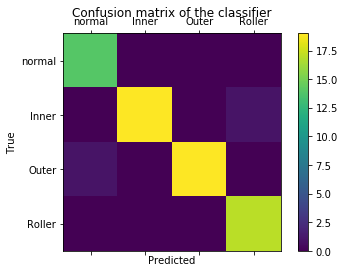

In [20]:
labels = ['normal', 'Inner','Outer','Roller']
cm=confusion_matrix(Y_test,Y_ped)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

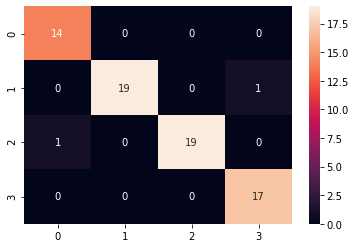

In [21]:
import seaborn as sns
sns.heatmap(cm, annot=True)

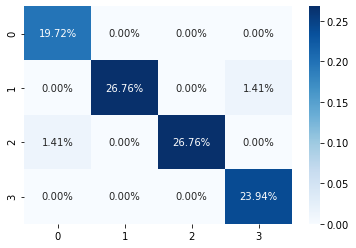

In [22]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [23]:
classifier=KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
classifier.fit (X_train,Y_train)
Y_ped=classifier.predict (X_test)
print (accuracy_score(Y_test,Y_ped))
Z_ped=classifier.predict(X_train)
print (accuracy_score(Y_train,Z_ped))

0.971830985915493
0.9757575757575757


In [24]:
classifier=KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')
classifier.fit (X_train,Y_train)
Y_ped=classifier.predict (X_test)
print (accuracy_score(Y_test,Y_ped))
Z_ped=classifier.predict(X_train)
print (accuracy_score(Y_train,Z_ped))

0.9859154929577465
0.9818181818181818


In [25]:
classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')
classifier.fit (X_train,Y_train)
Y_ped=classifier.predict (X_test)
print (accuracy_score(Y_test,Y_ped))
Z_ped=classifier.predict(X_train)
print (accuracy_score(Y_train,Z_ped))

0.9859154929577465
0.9818181818181818


In [26]:
classifier=KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
classifier.fit (X_train,Y_train)
Y_ped=classifier.predict (X_test)
print (accuracy_score(Y_test,Y_ped))
Z_ped=classifier.predict(X_train)
print (accuracy_score(Y_train,Z_ped))

0.9859154929577465
0.9818181818181818


In [27]:
classifier=KNeighborsClassifier(n_neighbors=1,p=2,metric='euclidean')
classifier.fit (X_train,Y_train)
Y_ped=classifier.predict (X_test)
print (accuracy_score(Y_test,Y_ped))
Z_ped=classifier.predict(X_train)
print (accuracy_score(Y_train,Z_ped))

0.9859154929577465
1.0


In [28]:
classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')
classifier.fit (X_train,Y_train)
Y_ped=classifier.predict (X_test)
print (accuracy_score(Y_test,Y_ped))
Z_ped=classifier.predict(X_train)
print (accuracy_score(Y_train,Z_ped))

0.9859154929577465
0.9818181818181818


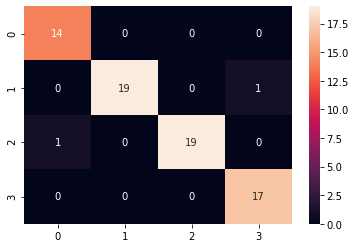

In [29]:
sns.heatmap(cm, annot=True)

In [30]:
print (f1_score(Y_test,Y_ped,average='macro'))

0.9864468864468865


In [31]:
 from sklearn.metrics import precision_score

In [32]:
precision_score(Y_test, Y_ped, average='macro')

0.9861111111111112

In [33]:
from sklearn.metrics import recall_score

In [58]:
recall_score(Y_test, Y_ped, average='macro')

0.9961685823754789

In [34]:
Ks=50
mean_acc=np.zeros((Ks-1))
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(Y_test,yhat)

In [35]:
print(mean_acc)

[0.98591549 0.97183099 0.98591549 0.98591549 0.98591549 0.98591549
 0.98591549 0.97183099 0.97183099 0.97183099 0.97183099 0.97183099
 0.95774648 0.97183099 0.95774648 0.95774648 0.95774648 0.94366197
 0.94366197 0.94366197 0.92957746 0.95774648 0.95774648 0.94366197
 0.92957746 0.92957746 0.90140845 0.90140845 0.91549296 0.88732394
 0.90140845 0.90140845 0.88732394 0.90140845 0.90140845 0.91549296
 0.91549296 0.90140845 0.91549296 0.90140845 0.90140845 0.90140845
 0.90140845 0.88732394 0.87323944 0.87323944 0.85915493 0.84507042
 0.85915493]


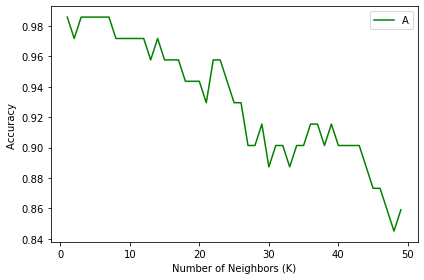

In [36]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [37]:
cm1=pd.DataFrame(data=cm,index=['normal', 'Inner','Outer','Roller'],columns=['normal', 'Inner','Outer','Roller'])
cm1

,normal,Inner,Outer,Roller
normal,14,0,0,0
Inner,0,19,0,1
Outer,1,0,19,0
Roller,0,0,0,17
